In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [5]:
df = pd.read_excel("/content/drive/MyDrive/naive_bayes_students_100.xlsx")
print(df.head())

   Hours_Studied Attendance Internet_Access Result
0              2        Low              No   Fail
1              3        Low             Yes   Fail
2              4     Medium              No   Fail
3              5     Medium             Yes   Pass
4              6       High              No   Pass


In [7]:
le_attendance = LabelEncoder()
le_internet = LabelEncoder()
le_result = LabelEncoder()

df["Attendance"] = le_attendance.fit_transform(df["Attendance"])
df["Internet_Access"] = le_internet.fit_transform(df["Internet_Access"])
df["Result"] = le_result.fit_transform(df["Result"])
print(df.head())

   Hours_Studied  Attendance  Internet_Access  Result
0              2           1                0       0
1              3           1                1       0
2              4           2                0       0
3              5           2                1       1
4              6           0                0       1


In [14]:
X = df[["Hours_Studied", "Attendance", "Internet_Access"]]
y = df["Result"]


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

    Hours_Studied  Attendance  Internet_Access
55              7           0                1
88             10           0                0
26              8           0                0
42              4           2                0
69              1           1                1
..            ...         ...              ...
60              2           1                0
71              3           1                1
14              6           0                0
92              4           2                0
51              3           1                1

[80 rows x 3 columns]
55    1
88    1
26    1
42    0
69    0
     ..
60    0
71    0
14    1
92    0
51    0
Name: Result, Length: 80, dtype: int64
    Hours_Studied  Attendance  Internet_Access
83              5           2                1
53              5           2                1
70              2           1                0
45              7           0                1
44              6           0                0
39  

In [18]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [20]:
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0]


In [22]:
decoded_pred = le_result.inverse_transform(y_pred)
decoded_actual = le_result.inverse_transform(y_test)
print(decoded_pred)
print(decoded_actual)

[0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0]
[1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0]


In [23]:
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.8


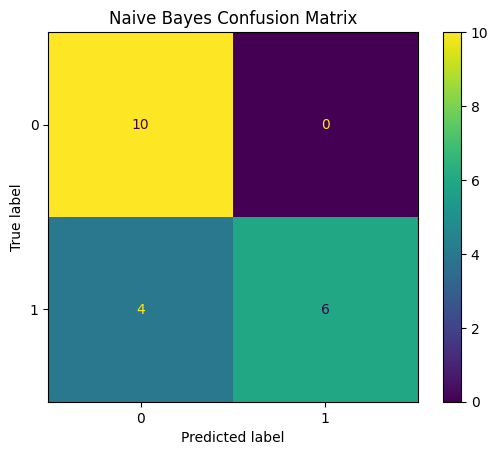

In [29]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=le_result.classes_)
disp.plot()
plt.title("Naive Bayes Confusion Matrix")
plt.show()


In [31]:
import numpy as np
le_attendance = LabelEncoder()
le_attendance.fit(['High', 'Low', 'Medium'])

le_internet = LabelEncoder()
le_internet.fit(['No', 'Yes'])

sample = [[6,
           le_attendance.transform(np.array(["High"]))[0],
           le_internet.transform(np.array(["Yes"]))[0]]]

prediction = model.predict(sample)
print("Predicted Result:", le_result.inverse_transform(prediction)[0])

Predicted Result: 1


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
